In [1]:
import os
import glob
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

def compute_pixel_share(input_folder: str, output_csv: str, pattern: str = 'scene_*_synthetic_gaussian.tiff'):
    """
    Reads all TIFF files matching `pattern` in `input_folder`, computes the proportion
    of pixels == 1 in each, writes results to `output_csv`, and plots a histogram.
    
    Parameters
    ----------
    input_folder : str
        Path to the folder containing your TIFF files.
    output_csv : str
        Path where the CSV of results will be saved.
    pattern : str, optional
        Glob pattern to select TIFF files (default is 'scene_*_synthetic_gaussian.tiff').
        
    Returns
    -------
    pandas.DataFrame
        DataFrame with columns ['filename', 'share_one'].
    """
    # find all matching TIFFs
    file_paths = glob.glob(os.path.join(input_folder, pattern))
    records = []

    for path in file_paths:
        # load as NumPy array
        img = Image.open(path)
        arr = np.array(img)
        
        total_pixels = arr.size
        ones = int((arr == 1).sum())
        share = ones / total_pixels
        
        records.append({
            'filename': os.path.basename(path),
            'share_one': share,
            'ones': ones,
            'total_pixels': total_pixels
        })

    # build DataFrame and save
    df = pd.DataFrame.from_records(records)
    #df.to_csv(output_csv, index=False)
    print(f"Wrote results for {len(df)} files to {output_csv!r}")

    # plot histogram
    plt.figure()
    plt.hist(df['share_one'], bins=50)
    plt.xlabel('Share of pixels == 1')
    plt.ylabel('Number of TIFFs')
    plt.title('Histogram of pixel-share==1 across scenes')
    plt.tight_layout()
    plt.show()
    
    return df


Wrote results for 3566 files to 'haha.csv'


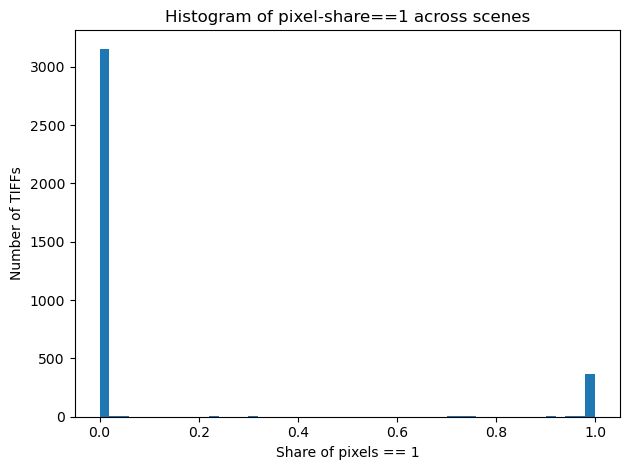

In [5]:
# Example usage:
df = compute_pixel_share('/Users/sayedmorteza/Library/CloudStorage/Box-Box/Caltech Research/Scripts/ImageTRT/Synthetic Data Generation/Results/Treatment', 'haha.csv')

In [7]:
df.describe()

,share_one,ones,total_pixels
count,3566.000000,3566.000000,3566.0
mean,0.109296,7162.826416,65536.0
std,0.309141,20259.878352,0.0
min,0.000000,0.000000,65536.0
25%,0.000000,0.000000,65536.0
50%,0.000000,0.000000,65536.0
75%,0.000000,0.000000,65536.0
max,1.000000,65536.000000,65536.0


Array shape: (8, 8)


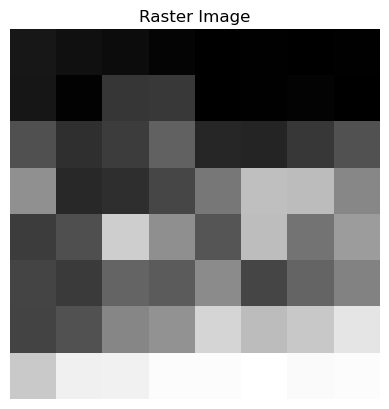

mean pixels: 1.3557507
std pixels: 0.23894855
max pixels: 1.8042618
min pixels: 1.0493803
total pixels: 64


In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

n = 3044

path = f"/Users/sayedmorteza/Library/CloudStorage/Box-Box/Hetwet_Data/Synthetic/Theta/Theta_scene_{n}.tiff"

import rasterio as rio

with rio.open(path) as src:
        arr = src.read(1)

img = Image.fromarray(arr)
print("Array shape:", arr.shape)
total_pixels = arr.size

plt.imshow(arr, cmap='gray')
plt.title("Raster Image")
plt.axis('off')
plt.show()

print("mean pixels:", np.mean(arr))
print("std pixels:", np.std(arr))
print("max pixels:", np.max(arr))
print("min pixels:", np.min(arr))
print("total pixels:", total_pixels)

In [3]:
arr

array([[0.91501355, 0.86963826, 0.92978865, 0.9676278 , 0.9556921 ,
        0.91520214, 0.8965586 , 0.89827454],
       [0.86791325, 0.85473806, 0.87421393, 0.89969385, 0.89136755,
        0.8864301 , 0.89633274, 0.9149107 ],
       [0.9186495 , 0.8793188 , 0.8809833 , 0.86235046, 0.85826004,
        0.87089086, 0.9006477 , 0.9073174 ],
       [0.88788784, 0.8866053 , 0.8651663 , 0.8610563 , 0.8793454 ,
        0.88102955, 0.8950472 , 0.9089735 ],
       [0.9132053 , 0.9104811 , 0.893715  , 0.90631986, 0.9117287 ,
        0.89742297, 0.92092055, 0.91754943],
       [0.9117398 , 0.87830126, 0.8634055 , 0.8991793 , 0.888954  ,
        0.88313365, 0.8993826 , 0.8720651 ],
       [0.876698  , 0.85268337, 0.8612435 , 0.903489  , 0.93948984,
        0.9166696 , 0.9004087 , 0.81238914],
       [0.8846607 , 0.8787383 , 0.94624424, 0.9699706 , 0.9175837 ,
        0.9106399 , 0.88109565, 0.729878  ]], dtype=float32)